# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



# Исследование надежности заемщиков

Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных

children — количество детей в семье
days_employed — общий трудовой стаж в днях
dob_years — возраст клиента в годах
education — уровень образования клиента
education_id — идентификатор уровня образования
family_status — семейное положение
family_status_id — идентификатор семейного положения
gender — пол клиента
income_type — тип занятости
debt — имел ли задолженность по возврату кредитов
total_income — ежемесячный доход
purpose — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('D:\Мои Документы\Desktop\Материалы по учебе\Предобработка данных\data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

1. Считаем долю лиц, у которых есть задолжности по возврату кредитов, к общему числу заемщиков.

In [22]:
debt_sum = data.loc[data['debt']==1,'debt'].sum()
total = data['debt'].count()
debt_conversion = debt_sum/total
print(f'Доля лиц с задолжностями по кредитам {debt_conversion:.3f}')

Доля лиц с задолжностями по кредитам 0.081


2. Теперь проведем исследования, есть ли зависисмость между количеством детей и долей лиц, у которых есть задолжности по возврату кредитов. Сначала оределяем, как часто встречаются уникальные значения в столбце children методом value_counts().

In [23]:
print(data['children'].value_counts()) 

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


3. Определяем, как часто встречаются уникальные занчения в столбце debt методом value_counts().

In [24]:
print(data['debt'].value_counts())

0    19599
1     1732
Name: debt, dtype: int64


4. Группируем датафрейм по столбцу children и считаем уникальные значения в столбце debt, чтобы посмотреть количество возвратов в срок и наличия задолжностей по каждому варианту количества детей в столбце children. 

In [25]:
print(data.groupby('children')['debt'].value_counts())

children  debt
0         0       13028
          1        1063
1         0        4364
          1         444
2         0        1858
          1         194
3         0         303
          1          27
4         0          37
          1           4
5         0           9
Name: debt, dtype: int64


5. Вышеперечисленные действия (2-4) были нужны для ознакомления с данными. Теперь считаем конверсию (отношение количества лиц, у которых есть задолжности по возврату кредита, к общему числу заемщиков) по каждому уникальному значению в столбце children (в зависимости от количества детей).

In [26]:
data_group_children = data.groupby('children').agg({'debt': ['count','sum']})
data_group_children['conversion'] = data_group_children['debt']['sum']/data_group_children['debt']['count']
print(data_group_children)

           debt       conversion
          count   sum           
children                        
0         14091  1063   0.075438
1          4808   444   0.092346
2          2052   194   0.094542
3           330    27   0.081818
4            41     4   0.097561
5             9     0   0.000000


**Вывод:**Проведя анализ данных и рассчет доли лиц, у которых есть задолжности по возврату кредтов, по всем заемщикам в целом и по заемщикам в зависимости от количества у них детей, можно сделать следующие выводы:
- доля лиц, у которых есть задолжности по возврату кредитов, по всем заемщикам отличается от доли лиц, у которых есть задолжность по возврату кредитов, в зависимости от количества у них детей
- доли лиц, у которых есть задолжность по возврату кредитов, в зависимости от количества детей отличается между собой, но не значительно. Скорее можно говорить о разнице между долей заемщиков, у которых есть задолжность по возврату кредита,  у лиц с детьми и без детей. Из расчитанных конверсий видно, что доля задолжностей у лиц без детей ниже, чем у лиц с детьми (0,075 у лиц без детьей и 0.092 - 0.094 у лиц с детьми)
- данных по заемщикам для лиц с количеством детей 3, 4, 5, на мой взгляд, не достаточно для проведения корректных оценок, поэтому расчитанные данные могут не отражать реальную картину.

Таким образом зависимость между количеством детей и возвратом кредита в срок есть, но она незначительная, скорее можно говорить о зависимости между людьми с детьми и без детей. Лица без детей возвращаю креди в срок чаще.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

1. Определяем, какие уникальные занчения есть в столбце family_status, как часто они встречаются.

In [27]:
print(data['family_status'].value_counts())

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64


2.Группируем датафрейм по столбцу family_status и считаем уникальные занчения в столбце debt, чтобы посмотреть количество возвратов в срок и наличия задолжностей по каждому варианту в столбце family_status

In [28]:
print(data.groupby('family_status')['debt'].value_counts())

family_status          debt
Не женат / не замужем  0        2523
                       1         273
в разводе              0        1105
                       1          84
вдовец / вдова         0         888
                       1          63
гражданский брак       0        3749
                       1         385
женат / замужем        0       11334
                       1         927
Name: debt, dtype: int64


3. Считаем конверсию (отношение количества лиц, у которых есть задолжности по возврату кредита, к общему числу заемщиков) по каждому уникальному значению в столбце family_status.

In [29]:
data_group_family_status = data.groupby('family_status').agg({'debt': ['count','sum']})
data_group_family_status['conversion'] = data_group_family_status['debt']['sum']/data_group_family_status['debt']['count']
print(data_group_family_status)

                        debt      conversion
                       count  sum           
family_status                               
Не женат / не замужем   2796  273   0.097639
в разводе               1189   84   0.070648
вдовец / вдова           951   63   0.066246
гражданский брак        4134  385   0.093130
женат / замужем        12261  927   0.075606


4. Для наглядности постороим график. Для этого удаляем индексацию в таблице data_group_family_status методом reset_index() с сохранением столбца с предыдущей индексацией. Подключаем библиотеку seaborn и строим столбчатую диаграмму.

In [30]:
df = data_group_family_status.reset_index()


<AxesSubplot:xlabel='conversion', ylabel='family_status'>

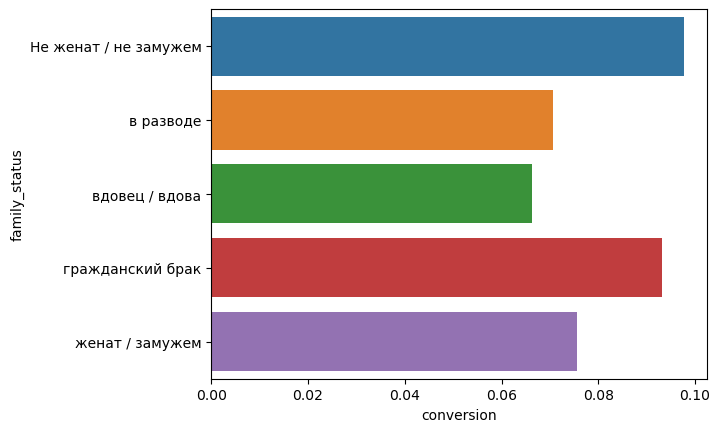

In [31]:
import seaborn

seaborn.barplot(y=df['family_status'], x=df['conversion'])

**Вывод:** Проведя расчеты конверсии по различным группам 'семейного положения' видно, что зависисмость между семейным положением и возвратом кредита в срок есть. Задолжности по возврату кредитов чаще возникают у не женатых/ не замужних лиц и лиц, состоящих в гражданском браке. Лица, состоящие в браке, в разводе, вдовы/вдовцы возвращают кредиты в срок чаще.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

1. Определяем, какие уникальные занчения есть в столбце total_income_category, как часто они встречаются.

In [32]:
print(data['total_income_category'].value_counts())

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64


2. Группируем датафрейм по столбцу total_income_category и считаем уникальные занчения в столбце debt, чтобы посмотреть количество возвратов в срок и наличия задолжностей по каждой категории уровня дохода

In [33]:
print(data.groupby('total_income_category')['debt'].value_counts())

total_income_category  debt
A                      0          23
                       1           2
B                      0        4660
                       1         354
C                      0       14568
                       1        1353
D                      0         328
                       1          21
E                      0          20
                       1           2
Name: debt, dtype: int64


3. Считаем конверсию (отношение количества лиц, у которых есть задолжности по возврату кредита, к общему числу заемщиков) по каждому уникальному значению в столбце total_income_category

In [34]:
data_group_income = data.groupby('total_income_category').agg({'debt': ['count','sum']})
data_group_income['conversion'] = data_group_income['debt']['sum']/data_group_income['debt']['count']
print(data_group_income)

                        debt       conversion
                       count   sum           
total_income_category                        
A                         25     2   0.080000
B                       5014   354   0.070602
C                      15921  1353   0.084982
D                        349    21   0.060172
E                         22     2   0.090909


**Вывод:** Считаю, что данных по заемщикам с категорией зарплат А (доход миллион и выше), Е (доход до 30000), D (доход от 30001 до 50000) по сравнению с другими категориями не достаточно для проведения корректных оценок, поэтому расчитанные данные могут не отражать реальную картину. Сравнивая категории В и С, мы видим, что кредиыт в срок чаще возврщают лица с доходом от 200001 до 1000000 руб, чем лица с доходом от 50001 до 200000. 
Стоит также отметить, что на результаты исследования могло повлиять большое количество пропусков (2174), которые были заменены медианными значениями.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

1. Определяем, какие уникальные занчения есть в столбце purpose_category, как часто они встречаются.

In [35]:
print(data['purpose_category'].value_counts())

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64


2. Группируем датафрейм по столбцу purpose_category и считаем уникальные занчения в столбце debt, чтобы посмотреть количество возвратов в срок и наличия задолжностей по каждой категории цели кредита

In [36]:
print(data.groupby('purpose_category')['debt'].value_counts())

purpose_category          debt
операции с автомобилем    0       3879
                          1        400
операции с недвижимостью  0       9971
                          1        780
получение образования     0       3619
                          1        369
проведение свадьбы        0       2130
                          1        183
Name: debt, dtype: int64


3. Считаем конверсию (отношение количества лиц, у которых есть задолжности по возврату кредита, к общему числу заемщиков) по каждому уникальному значению в столбце purpose_category

In [37]:
data_group_purpose = data.groupby('purpose_category').agg({'debt': ['count','sum']})
data_group_purpose['conversion'] = data_group_purpose['debt']['sum']/data_group_purpose['debt']['count']
print(data_group_purpose)

                           debt      conversion
                          count  sum           
purpose_category                               
операции с автомобилем     4279  400   0.093480
операции с недвижимостью  10751  780   0.072551
получение образования      3988  369   0.092528
проведение свадьбы         2313  183   0.079118


4. Для наглядности постороим график. Для этого удаляем индексацию в таблице data_group_purpose методом reset_index() с сохранением столбца с предыдущей индексацией. Строим столбчатую диаграмму.

<AxesSubplot:xlabel='conversion', ylabel='purpose_category'>

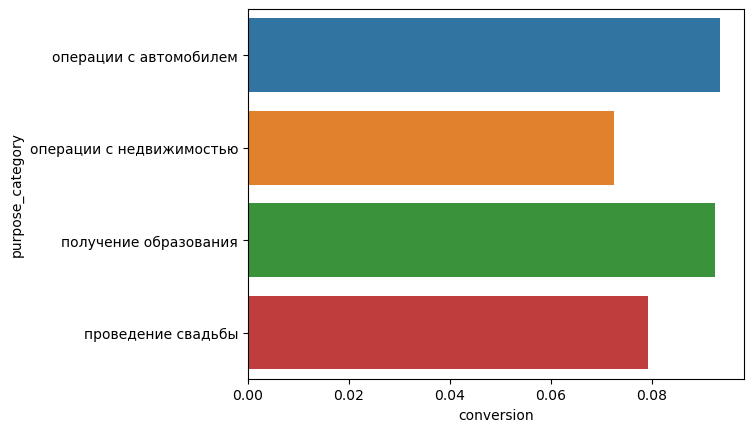

In [38]:
df2 = data_group_purpose.reset_index()

seaborn.barplot (y=df2['purpose_category'], x=df2['conversion'])

**Вывод:** Зависимость между целью выдачи кредита и возвратом его в срок есть. Чаще возвращают кредитв в срок, если брали их на операции с недвижимостью и проведение свадьбы, реже возвращают кредиты в срок, если их брали на образование и операции с автомобилями.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Например, пропуски в столбце days-employed могли возникнуть у людей, ранее не работавших, и они пропустили колонку (если нет задачи ее заполнить в обязательбном порядке).Также у ряда лиц молгли возникнуть затруднения с подсчетом стажа. Пропуски в зарабтной платье могли возникнуть по причине, что человек не захотел указывать свой доход, особенно люди с высоким доходом стараются это не говорить.

Пропуски в столбцах days-employed и total_income встречаются в одних и тех же строках. При этом пропуски встречаются для следующих значениях в столбце income_type: пенсионер, госслужащий, компаньон, сотрудник, предприниматель. Возможно для данных категорий у банка есть особые условия для предоставления кредитов, и данные указанные в этих столбцах могут не влиять на выдачу кредита, если данные категрии их не могут заполнить по каким-то причинам. Возможно в банке есть политика конфиденциальности в отношении ряда сотрудников и, например, их зарплата не может находиться в общем доступе (это для категории сотрудников). Возможно еще есть зависимость между этими столбцам. Если не заполнили один столбец, напрмер стаж, то второй столбец автоматически не заполняется. Или, если произошел какой-то технический сбой при внесений и хранении информации, и в одном столбце данные пропали, то они пропали и во втором столбце.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Если в выборке есть выдающиеся значения, то лучше заполнять пропуски медианными значениями. Применение средних значений может дать более большую погрешность.

### Шаг 4: общий вывод.

Напишите ваш общий вывод. Проанализировав полученные результаты, понимаем, что доля возвратов кредитов в срок в целом зависит от количества детей, категории дохода, целей, на которые берутся кредиты и семейного статуса, где-то эта зависимость более выражена, где-то менее. Также стоит отметить, что не по всем категориям заемщиков в данном датафрейме представлена достаточная выборка (например, при категории дохода А, Е, D), поэтому расчеты произвененные по ним могут не отражать действительность.  

**Общий вывод**
Было провежено исследование, чтобы вяснить влияние различных факторов на возвращение кредита в срок. Входные данные от банка - статистика о платежеспособности клиентов. Результаты исследования будут учтены про построении модели кредитного скориинга - специальной системы, которая оценивает способность потенциального заемщика вернуть кредит в срок.
Перед проведением исследования было решено проверить следующие:
1. Есть ли зависимость между возвратом кредита в срок и количеством детей.
2. Есть ли зависимость между семейны статусом и возвратом кредита в срок.
3. Есть ли зависимость между доходом и возвратом кредита в срок.
4. Если ли зависимость между целью кредита и возвратом кредита в срок.

В результате удалось выяснить следующие зависимости.

**1. Зависимость между возвратом кредита и количеством детей - подтверждена частично**, для получения более точных данных необходимо больше данных по клиентам с количеством детей 3,4,5.

 7,5% - доля просроченных кредитов у заемщиков без детей
 9,2% - доля просроченных кредитов у заемщиков с 1 ребенком
 9,4% - доля просроченных кредитов у заемщиков с 2 детьми
 
*Рекомендация* - провести дополнительное исследование на большей выборке.

**2. Зависимость между семейным статусом и возвратом кредита в срок - подтвердилась**.

- У лиц, не состояших в браке, и лиц, состоящие в гражданском браке, вероятность стать должноком выше. Доля невозврата кредита в срок в этих группах 9,76 % и 9,31% соответсвенно  
- Лица состояшие в браке, разведенные и овдовевшие с меньшей вероятностью становятся должниками. Доля невозврата 
кредита в срок в этих группах 7,56%, 7,06% и 6,62% соответсвенно

**3. Зависимость между доходом и возвратом кредита в срок. - подтверждена частично**, для более точных выводом необходимы дополнительные данные по категриям А (доход миллион и выше), Е (доход до 30000), D (доход от 30001 до 50000)
7,1% - доля просроченных кредитов у заемщиков В (доход от 200002 до 1000000) 
8,5% - доля просроченных кредитов у заемщиков С (доход от 50001 до 200000)

*Стоит также отметить, что на результаты исследования могло повлиять большое количество пропусков (2174), которые были заменены медианными значениями.* 

**4. Зависимость между целью кредита и возвратом кредита в срок - подтвердилась**
9,3% - доля просроченных кредитов на операции с автомобилем     
7,3% - доля просроченных кредитов на операции с недвижимостью  
9,3% - доля просроченных кредитов на получение образования      
7,9% - доля просроченных кредитов на проведение свадьбы   

**Общие рекоменации:**
1. Можно использовать зависимости, полученные в результате исследования пол категориям "семейный статус" и "цель кредита"
2. необходимо собрать более полную выборку для проведения дополнительных исследований по категриям "количество детьей" и "доход"
